In [1]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#importing Data set
data= pd.read_csv('G:/dataset/ecom.csv')

In [3]:
data.head(100)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
95,middletonrenee@gmail.com,"71757 David Freeway Apt. 851\nWest Carriefurt,...",DarkCyan,32.461212,13.291143,38.633626,3.871003,543.340166
96,grichardson@ryan.info,"79139 Boone Common\nStewartstad, DE 63633-1812",SteelBlue,33.790387,11.942341,38.063414,4.081803,521.142952
97,esmith@gmail.com,USS Johnson\nFPO AE 35617-5384,OldLace,34.183821,13.349913,37.827394,4.252006,614.715334
98,michael53@munoz.com,USNS Mitchell\nFPO AP 92946,MediumBlue,32.288667,12.020112,39.074400,3.911709,507.390062


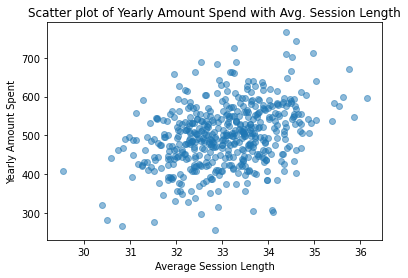

In [4]:
plt.scatter(data['Avg. Session Length'],data['Yearly Amount Spent'], alpha=0.5)
plt.title('Scatter plot of Yearly Amount Spend with Avg. Session Length')
plt.xlabel('Average Session Length')
plt.ylabel('Yearly Amount Spent')
plt.show()

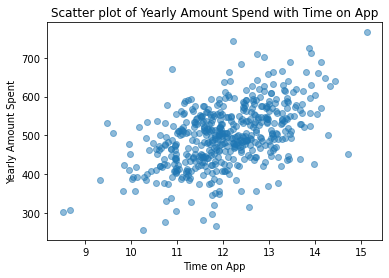

In [5]:
plt.scatter(data['Time on App'],data['Yearly Amount Spent'], alpha=0.5)
plt.title('Scatter plot of Yearly Amount Spend with Time on App')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()

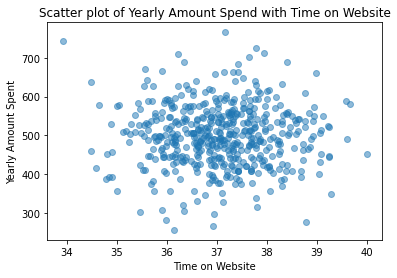

In [6]:
plt.scatter(data['Time on Website'],data['Yearly Amount Spent'], alpha=0.5)
plt.title('Scatter plot of Yearly Amount Spend with Time on Website')
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.show()

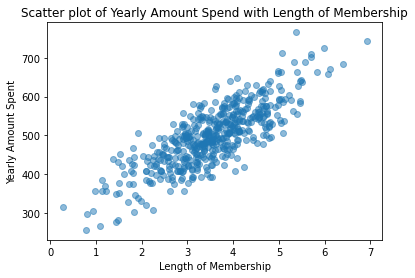

In [7]:
plt.scatter(data['Length of Membership'],data['Yearly Amount Spent'], alpha=0.5)
plt.title('Scatter plot of Yearly Amount Spend with Length of Membership')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()

In [8]:
data.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [9]:
# as we can see that Avatar is the unique id given to every new customer that come and visit's the website so we are going to 
#eliminate that
data.drop(columns=['Avatar'],axis=1, inplace=True)

In [10]:
#we will drop email as well as it serve no purpose
data.drop(columns=['Address'],axis=1,inplace=True)

In [11]:
data.drop(columns=['Email'],axis=1,inplace=True)

In [12]:
data.head(50)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
5,33.871038,12.026925,34.476878,5.493507,637.102448
6,32.021596,11.366348,36.683776,4.685017,521.572175
7,32.739143,12.351959,37.373359,4.434273,549.904146
8,33.987773,13.386235,37.534497,3.273434,570.200409
9,31.936549,11.814128,37.145168,3.202806,427.199385


In [13]:
data.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [14]:
#creating dependent and independent variable
dependent_variable= 'Yearly Amount Spent'

In [15]:
#create a list of independent variable
independent_variables=data.columns.tolist()


In [16]:
independent_variables.remove(dependent_variable)
independent_variables

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership']

In [17]:
#creating a matrix to collect all the independent and dependent variabes
x= data[independent_variables].values
y=data[dependent_variable].values

In [18]:
#splitting the dataset into the training set and test set
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

In [19]:
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred= regressor.predict(x_test)

In [21]:
math.sqrt(mean_squared_error(y_test,y_pred))
#by seeing the output i can be off by 9-8 while calculating yearly amount spend

10.376977587987447

In [22]:
#r2_score shows the accuracy of the model if i can say so. a good model should lie between 0-1, closer it is to the 1 greater is 
#the model
r2_score(y_test,y_pred)

0.9861123479795451

In [23]:
regressor.coef_

array([25.74838328, 38.32316819,  0.68510939, 61.56265883])

In [24]:
regressor.intercept_

-1057.0128089458335

In [25]:
data.head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
5,33.871038,12.026925,34.476878,5.493507,637.102448
6,32.021596,11.366348,36.683776,4.685017,521.572175
7,32.739143,12.351959,37.373359,4.434273,549.904146
8,33.987773,13.386235,37.534497,3.273434,570.200409
9,31.936549,11.814128,37.145168,3.202806,427.199385


In [26]:
predicted=[]
for i in range(0,500):
    avg=data['Avg. Session Length'][i]
    time=data['Time on App'][i]
    web=data['Time on Website'][i]
    mem=data['Length of Membership'][i]
    a= regressor.predict([[avg,time,web,mem]])
    predicted.append(a)


In [27]:
data['prediction']=predicted

In [28]:
data['diffrence']=data['prediction']-data['Yearly Amount Spent']

In [29]:
data.head(50)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,prediction,diffrence
0,34.497268,12.655651,39.577668,4.082621,587.951054,[594.6927232741698],[6.741669305769278]
1,31.926272,11.109461,37.268959,2.664034,392.204933,[380.3251530704049],[-11.879780373921506]
2,33.000915,11.330278,37.110597,4.104543,487.547505,[505.0309560418623],[17.48345117439021]
3,34.305557,13.717514,36.721283,3.120179,581.852344,[569.2429926118814],[-12.609351423336307]
4,33.330673,12.795189,37.536653,4.446308,599.406092,[590.9935607566285],[-8.412531289134904]
5,33.871038,12.026925,34.476878,5.493507,637.102448,[637.8368812942072],[0.7344333791331792]
6,32.021596,11.366348,36.683776,4.685017,521.572175,[516.6405011264237],[-4.931673631403669]
7,32.739143,12.351959,37.373359,4.434273,549.904146,[557.923894628465],[8.019748523170733]
8,33.987773,13.386235,37.534497,3.273434,570.200409,[558.3568514532392],[-11.843557510380379]
9,31.936549,11.814128,37.145168,3.202806,427.199385,[440.6782722395501],[13.478887344221903]


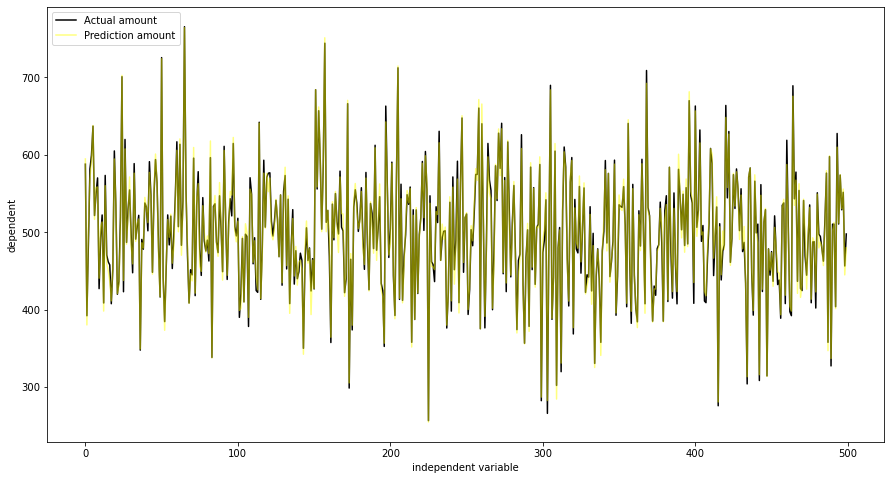

In [30]:
plt.figure(figsize=(15,8))
plt.plot(data['Yearly Amount Spent'], color='black', label='Actual amount')
plt.plot(data['prediction'], color='yellow', label='Prediction amount',alpha=0.5)
plt.xlabel("independent variable")
plt.ylabel("dependent")
plt.legend(loc="upper left")
plt.show()

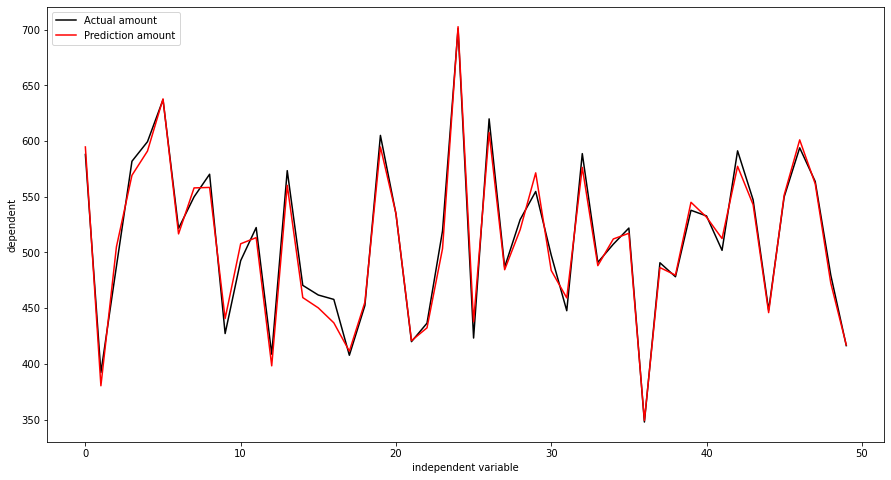

In [31]:
o=[]
u=[]
for i in range(0,50):
    o.append(data['Yearly Amount Spent'][i])
for i in range(0,50):
    u.append(data['prediction'][i])

plt.figure(figsize=(15,8))
plt.plot(o, color='black', label='Actual amount')
plt.plot(u, color='red', label='Prediction amount')
plt.xlabel("independent variable")
plt.ylabel("dependent")
plt.legend(loc="upper left")
plt.show()